In [2]:
!pip install pandas

In [3]:
from matplotlib.pyplot import boxplot
import pandas as pd

data = pd.read_csv('/home/otavio/ml/datasets/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
import matplotlib.pyplot as plt

data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
data = data.dropna()

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

([<matplotlib.patches.Wedge at 0x7eff4e2c7470>,
 [Text(0.004853567249738367, 1.0999892921683159, '3'),
  Text(-0.7639690238651042, -0.7914236100689693, '1'),
  Text(0.7947867924355496, -0.7604695618958137, '2')],
 [Text(0.0026474003180391088, 0.5999941593645358, '49.9%'),
  Text(-0.41671037665369315, -0.43168560549216506, '25.8%'),
  Text(0.43352006860120884, -0.41480157921589833, '24.3%')])

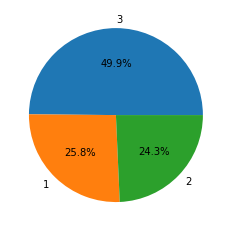

In [65]:
count = data['Pclass'].value_counts()

fig2, ax2 = plt.subplots()
ax2.pie(count.values, labels=data.Pclass.unique(), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7eff4ee7e908>,
 [Text(-0.4565551077247256, 1.0007784138411782, 'Male'),
  Text(0.45655510772472585, -1.000778413841178, 'Female')])

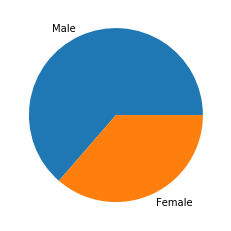

In [43]:
fig1, ax1 = plt.subplots()
ax1.pie([data['Sex'].value_counts()['male'], data['Sex'].value_counts()['female']], labels=['Male', 'Female'])

(array([ 54.,  46., 177., 169., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

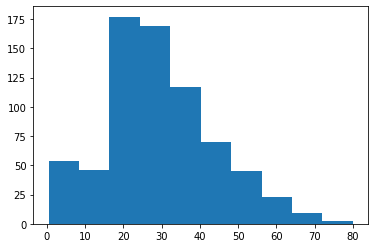

In [41]:
plt.hist(data['Age'])

(array([395., 168.,  46.,  37.,  18.,  14.,   6.,   8.,   2.,   0.,   4.,
          3.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.]),
 array([  0.      ,  20.493168,  40.986336,  61.479504,  81.972672,
        102.46584 , 122.959008, 143.452176, 163.945344, 184.438512,
        204.93168 , 225.424848, 245.918016, 266.411184, 286.904352,
        307.39752 , 327.890688, 348.383856, 368.877024, 389.370192,
        409.86336 , 430.356528, 450.849696, 471.342864, 491.836032,
        512.3292  ]),
 <a list of 25 Patch objects>)

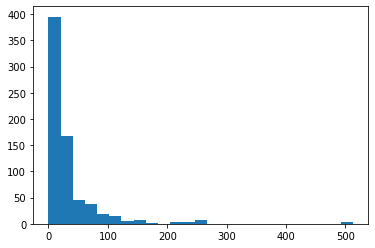

In [77]:
plt.hist(data['Fare'], bins='scott')

In [90]:
corr = data.corr()
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.266100
farecld        0.095969
Parch          0.095265
PassengerId    0.029526
SibSp         -0.015523
Age           -0.082446
Pclass        -0.356462
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff4c155e48>,
      dtype=object)

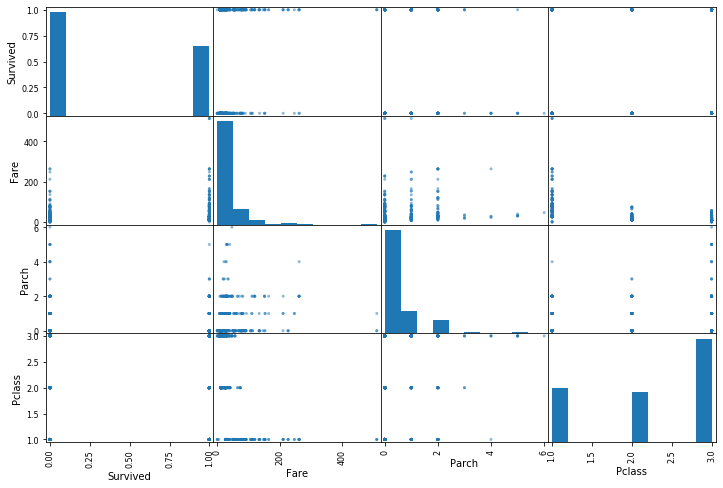

In [94]:
from pandas.plotting import scatter_matrix
attributes = ['Survived', 'Fare', 'Parch', 'Pclass']

scatter_matrix(data[attributes], figsize=(12, 8))